In [ ]:
!pip install qiskit qiskit-ibm-runtime pylatexenc qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.9/363.9 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 9.4 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256

In [ ]:
import qiskit
qiskit.version.get_version_info()

'2.0.1'

In [ ]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.circuit.library import QFT,PhaseEstimation

import numpy as np
from numpy.random import randint
from math import gcd,lcm
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
from numpy.random import randint
from math import gcd,lcm
# factoring N=21
N =  21  # number to be factored
n =   5   # number of qubits representing N
t =  2*n + 1 # number of evaluation qubits
a = randint(2,N)
g = gcd(a,N)
print(f"a = {a}, gcd({a},{N}) = {g}") # if g != 1, g is a factor of N

a = 20, gcd(20,21) = 1


In [ ]:
# myQPE() returns phase estimation circuit
from qiskit.circuit.library import QFT

def myQPE(t, unitary):
    n = unitary.num_qubits
    rx = QuantumRegister(t,'qx')
    ry = QuantumRegister(n,'qy')
    qc = QuantumCircuit(rx, ry)

    # QuantumCircuit 객체 unitary 를 Gate 객체 gate 로 만들고 이름을 "U"로 정한다.
    gate = unitary.to_gate()
    gate.name = "U"

    # 제어-U 게이트 c_gate 를 만들고 QPE 회로를 생성한다.
    c_gate = gate.control(1)

    qc.h(rx)
    for i in range(t):
        for j in range(2**i):
            qc.append(c_gate, rx[i:i+1]+ry[:])

    qc.append(QFT(t,inverse=True),rx)
    qc.name = 'myQPE'
    return qc



In [ ]:
# generate U matrix of (a*i) mod N for 0 ~ N-1
two_power_n = 1 << n # 2^n
U = np.eye(two_power_n) # Identity matrix
for j in range(N):
    U[j][j] = 0
    U[(a*j)%N][j] = 1
# U 행렬을 구현하는 양자 회로 qcU 를 생성
qcU = QuantumCircuit(n)
qcU.unitary(U, range(n))


In [ ]:
from qiskit.visualization import array_to_latex
array_to_latex(U, prefix="U = ", max_size=32)

<IPython.core.display.Latex object>

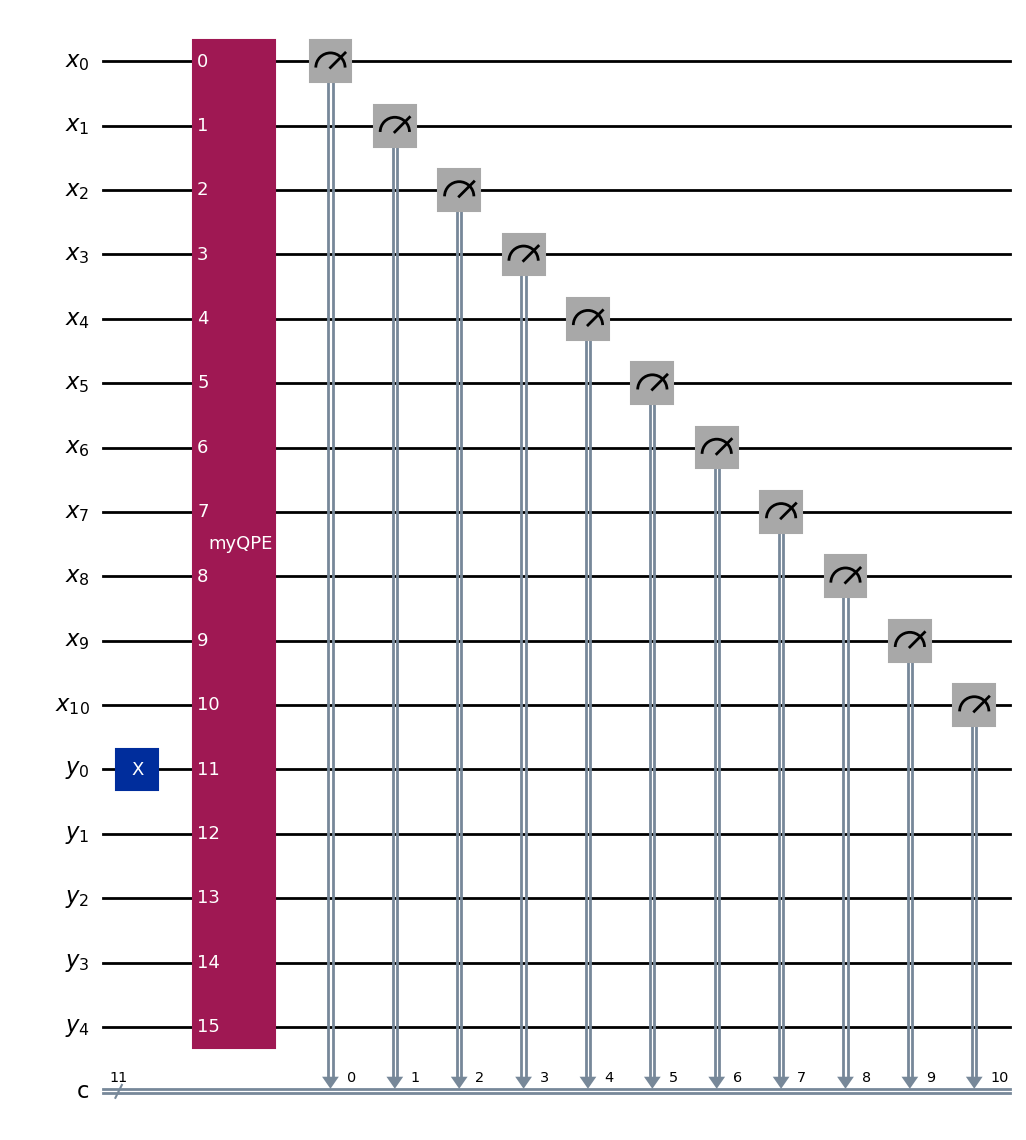

In [ ]:
# generate a order-finding circuit using myQPE
qx = QuantumRegister(t,'x')
qy = QuantumRegister(n,'y')
c = ClassicalRegister(t,'c')
qc_of = QuantumCircuit(qx, qy, c)
qc_of.x(qy[0])                 # input state = |1>
qc_of.append(myQPE(t,qcU),qx[:]+qy[:])
qc_of.measure(qx,c)
qc_of.draw(output='mpl',fold=-1)

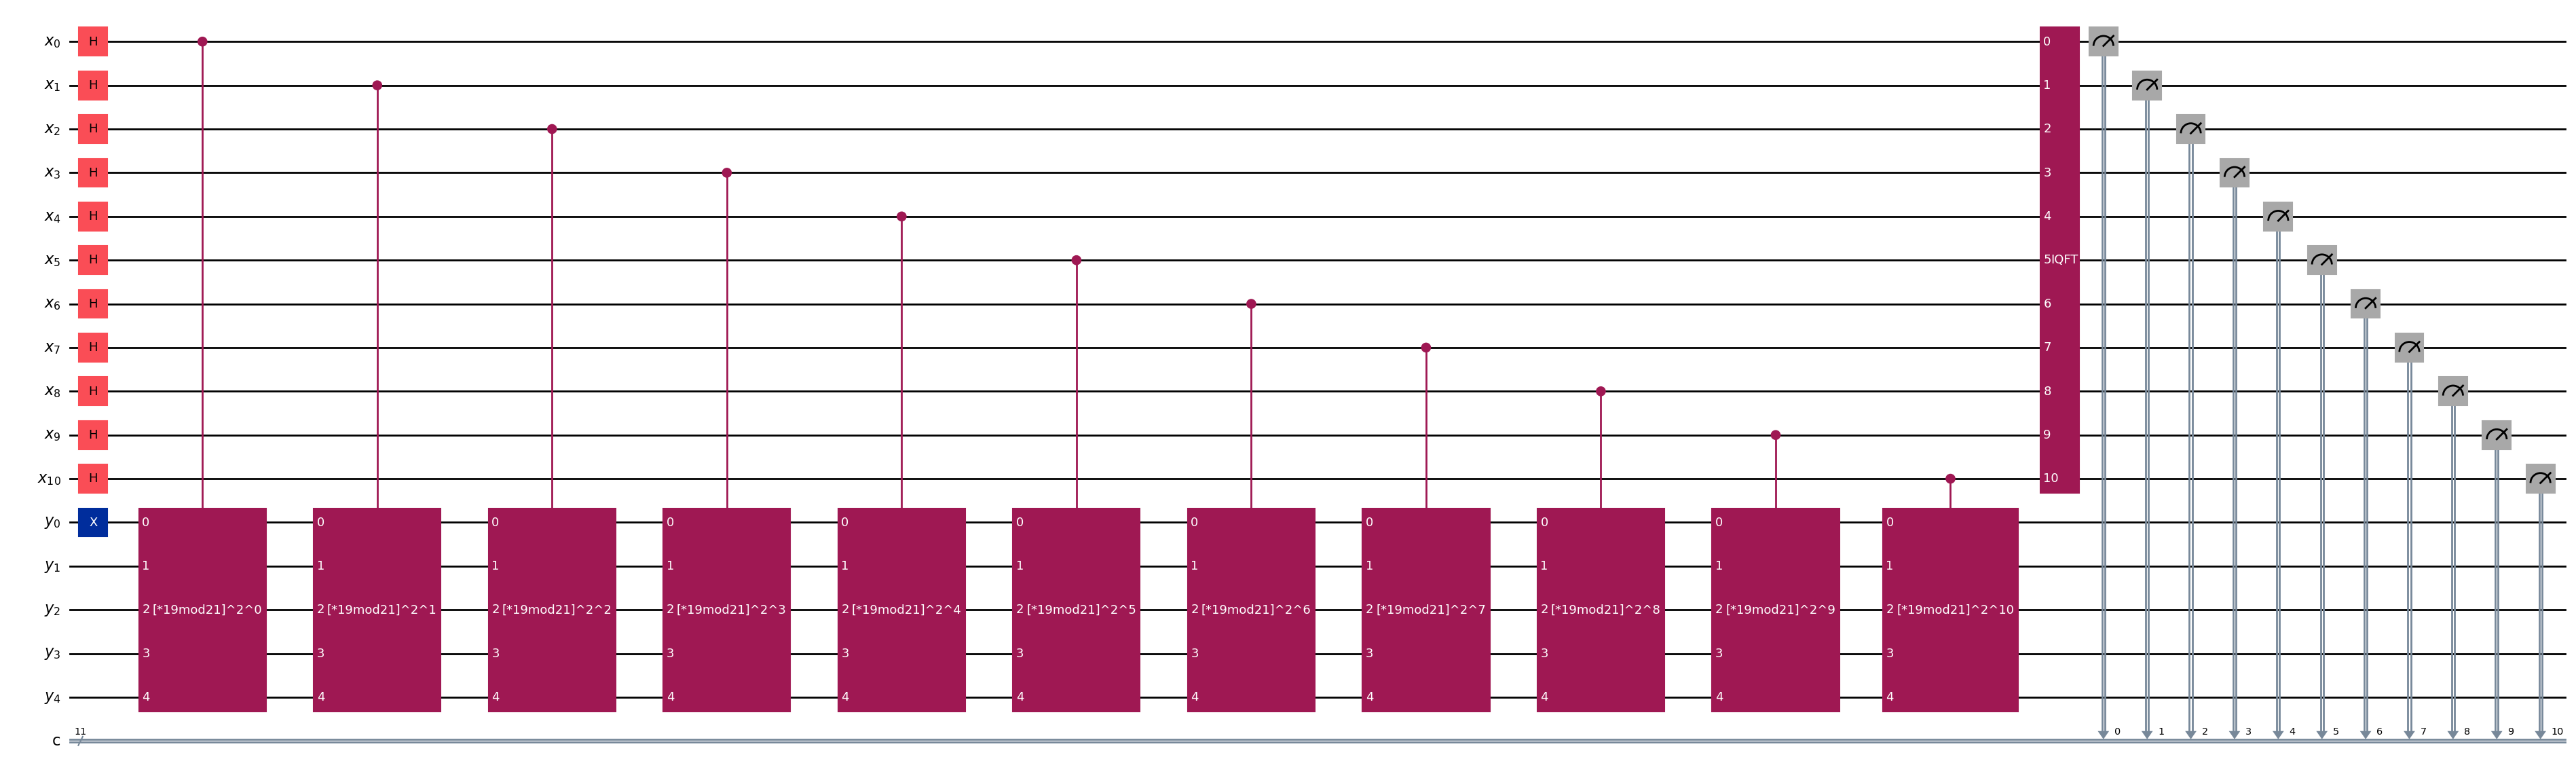

In [ ]:
# generate an order-finding circuit
qx = QuantumRegister(t,'x')
qy = QuantumRegister(n,'y')
c = ClassicalRegister(t,'c')
qc_of = QuantumCircuit(qx, qy, c)
qc_of.x(qy[0])              # input state = |1>

qc_of.h(qx)

two_power_n = 1 << n # 2^n
u_power = np.eye(two_power_n) # Identity matrix
for j in range(N):
    u_power[j][j] = 0
    u_power[(a*j)%N][j] = 1

for i in range(t):
    qc_u_power = QuantumCircuit(n)
    qc_u_power.unitary(u_power, range(n))
    gate_u_power = qc_u_power.to_gate()
    gate_u_power.name = f'[*{a}mod{N}]^2^{i}'
    c_gate_u_power = gate_u_power.control(1)
    qc_of.append(c_gate_u_power, [qx[i]] + qy[:])
    u_power = u_power @ u_power

qc_of.append(QFT(t,inverse=True), qx)

qc_of.measure(qx,c)
qc_of.draw(output='mpl',fold=-1)

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=3)
isa_circuit = pm.run(qc_of)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=1000)
result = job.result()
count = result[0].data.c.get_counts()
print(count)

{'10101010110': 25, '00101010110': 28, '10000000000': 134, '01010101011': 119, '01010101100': 10, '00000000000': 179, '10101010101': 120, '10101010011': 1, '01010101101': 3, '00101010101': 119, '11010101011': 124, '11010101010': 31, '11010101100': 7, '11010101000': 4, '00101010010': 2, '10101010100': 8, '00101010111': 6, '10101010111': 8, '00101011001': 2, '00101010011': 3, '01010101111': 1, '00101010100': 9, '11010101001': 4, '01010101010': 20, '01010101001': 4, '00100111010': 1, '10101100100': 1, '10101011010': 1, '11010100100': 2, '11010101111': 2, '11010101110': 3, '00101111011': 1, '11010100111': 1, '11010001100': 1, '11010110001': 1, '01010101110': 2, '01010100111': 1, '00101011010': 1, '01010000110': 1, '11010111001': 1, '01010110011': 1, '01010110010': 1, '01000111001': 1, '01010000011': 1, '10101001111': 1, '10101011000': 1, '00101011110': 1, '01010111100': 1, '01110000011': 1}


In [ ]:
from fractions import Fraction
r_pre = 1<<t  # r_pre == 2^t
estimated = dict()
for i in range(N):
    estimated[i] = 0
print('measured value    estimated order')
for measured in count :
    s_pre = int(measured,2) # convert a binary string to an integer
    f = Fraction(s_pre/r_pre).limit_denominator(N-1)
    r = f.denominator
    s = f.numerator
    print(f'{measured} -> {s_pre}/{r_pre} -> {s}/{r} -> {r}' )
    estimated[r] += count[measured]
print('order : frequency')
for i in range(N):
    print(f'  {i}  :  {estimated[i]}')

measured value    estimated order
10101010110 -> 1366/2048 -> 2/3 -> 3
00101010110 -> 342/2048 -> 1/6 -> 6
10000000000 -> 1024/2048 -> 1/2 -> 2
01010101011 -> 683/2048 -> 1/3 -> 3
01010101100 -> 684/2048 -> 1/3 -> 3
00000000000 -> 0/2048 -> 0/1 -> 1
10101010101 -> 1365/2048 -> 2/3 -> 3
10101010011 -> 1363/2048 -> 2/3 -> 3
01010101101 -> 685/2048 -> 1/3 -> 3
00101010101 -> 341/2048 -> 1/6 -> 6
11010101011 -> 1707/2048 -> 5/6 -> 6
11010101010 -> 1706/2048 -> 5/6 -> 6
11010101100 -> 1708/2048 -> 5/6 -> 6
11010101000 -> 1704/2048 -> 5/6 -> 6
00101010010 -> 338/2048 -> 1/6 -> 6
10101010100 -> 1364/2048 -> 2/3 -> 3
00101010111 -> 343/2048 -> 1/6 -> 6
10101010111 -> 1367/2048 -> 2/3 -> 3
00101011001 -> 345/2048 -> 1/6 -> 6
00101010011 -> 339/2048 -> 1/6 -> 6
01010101111 -> 687/2048 -> 1/3 -> 3
00101010100 -> 340/2048 -> 1/6 -> 6
11010101001 -> 1705/2048 -> 5/6 -> 6
01010101010 -> 682/2048 -> 1/3 -> 3
01010101001 -> 681/2048 -> 1/3 -> 3
00100111010 -> 314/2048 -> 2/13 -> 13
10101100100 -> 1380

In [ ]:
def estimate_order(sampler, isa_circuit, t):
    job = sampler.run([isa_circuit], shots=1)
    result = job.result()
    count = result[0].data.c.get_counts()
    phase = list(count.keys())
    s_pre = int(phase[0],2) # convert a binary string to an integer
    r_pre = 1<<t  # r_pre == 2^t
    f = Fraction(s_pre/r_pre).limit_denominator(N-1)
    return  f.denominator

def confirm_order(a, r, N):
    return (a**r % N == 1)

r = estimate_order(sampler, isa_circuit, t)
if confirm_order(a, r, N):
    found = True
else :
    r1 = r
    r2 = estimate_order(sampler, isa_circuit, t)
    if confirm_order(a, r2, N):
        r = r2
        found = True
    else :
        r = lcm(r1, r2)
        if r >= N :
            found = False
        elif confirm_order(a, r, N):
            found = True
        else :
            found = False
    print(f"r1={r1} r2={r2} estimated r={r}")

if (found) :
    print(f"estimated value {r} is an order of {a} for {N}")
else :
    print(f"{r} is NOT an order of {a} for {N} because {a}^{r} % {N} = {a**r%N}")

r1=3 r2=3 estimated r=3
3 is NOT an order of 19 for 21 because 19^3 % 21 = 13


In [ ]:
if r % 2 == 0 : # r is even
    a_power_r_over2 = a**int(r/2)
    p = gcd(a_power_r_over2+1,N)
    print (f"p = gcd( {a}^({r}/2) + 1 (= {a_power_r_over2+1}), {N} ) = {p}")
    if (p == N)  :
        print (f"{a}^({r}/2) + 1 (= {a_power_r_over2+1}) is a multiple of {N}.")
        print (f" a = {a} is not lucky. try again.")
    elif (p == 1) :
        print (f" r = {r} is not an order of {a}. try again.")
    else :
        q = gcd(a_power_r_over2-1,N)
        print (f"q = gcd( {a}^({r}/2) - 1 (= {a_power_r_over2-1}), {N} ) = {q}")
        print (f"{p} and {q} are factors of {N}")
else :
    print (f"r = {r} is an odd number. a = {a} is not lucky. try again.")

r = 3 is an odd number. a = 19 is not lucky. try again.
